CS 412 HW-3 Efe Koyuncu 29404

Load the dataset and preprocess the data

In [90]:
from google.colab import files
import pandas as pd
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [91]:
from google.colab import files

uploaded = files.upload()
filename = next(iter(uploaded))
data = pd.read_csv(io.BytesIO(uploaded[filename]))

Saving titanicdata.csv to titanicdata (5).csv


In [92]:


data['Sex'] = data['Sex'].map({1: 1, 2: 0})

# Set random seed
np.random.seed(42)

# Prepare the feature matrix and target vector
X = data[['Pclass', 'Sex', 'Age']].values
y = data['Survived'].values

# Split the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Initialize the StandardScaler and fit it on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Scale the validation and test sets using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Implement the logistic regression model

In [93]:
class LogisticRegressionFromScratch:
    def __init__(self, learning_rate=0.1, num_iterations=100):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, X, y):
        m = y.size
        predictions = self.sigmoid(np.dot(X, self.weights))
        cost = (-1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        return cost

    def fit(self, X, y, X_val=None, y_val=None):
        # Initialize weights with zeros
        self.weights = np.zeros(X.shape[1])

        train_losses = []
        val_losses = []

        for i in range(self.num_iterations):
            # Compute predictions and errors
            predictions = self.sigmoid(np.dot(X, self.weights))
            errors = predictions - y

            # Update weights
            self.weights -= self.learning_rate * (1 / len(X)) * np.dot(X.T, errors)

            # Calculate training loss
            train_loss = self.compute_cost(X, y)
            train_losses.append(train_loss)

            # Calculate validation loss if validation data is provided
            if X_val is not None and y_val is not None:
                val_loss = self.compute_cost(X_val, y_val)
                val_losses.append(val_loss)

        return train_losses, val_losses

Set the step size to 0.1. Train your model using the training data. Calculate the loss on the validation
data. Plot both the training and validation losses across 100 iterations.

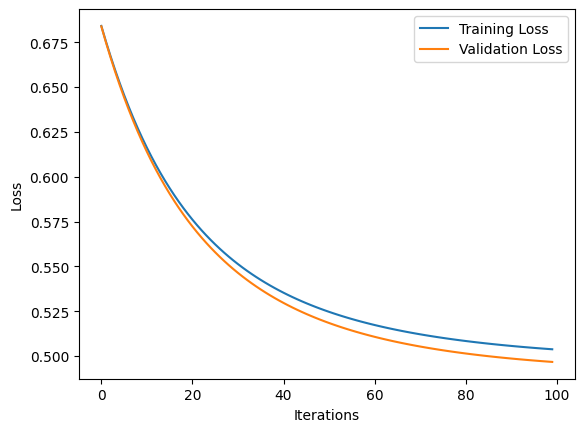

In [94]:
learning_rate = 0.1
num_iterations = 100

# Initialize the logistic regression model
log_reg = LogisticRegressionFromScratch(learning_rate=learning_rate, num_iterations=num_iterations)

# Train the model using the training data
train_losses, val_losses = log_reg.fit(X_train_scaled, y_train, X_val_scaled, y_val)

# Plot both the training and validation losses across 100 iterations
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

Now vary your step size and number of iterations, and calculate the validation loss in each case. Pick
the one that gives you the best loss. Plot the loss curve across different iterations for the chosen values
of these hyperparameters

Learning Rate: 0.001, Iterations: 100, Final Validation Loss: 0.6839707526220677
Learning Rate: 0.001, Iterations: 200, Final Validation Loss: 0.675274464916488
Learning Rate: 0.001, Iterations: 500, Final Validation Loss: 0.6518101469612896
Learning Rate: 0.01, Iterations: 100, Final Validation Loss: 0.6200221903380138
Learning Rate: 0.01, Iterations: 200, Final Validation Loss: 0.5763069162018518
Learning Rate: 0.01, Iterations: 500, Final Validation Loss: 0.5198023386336599
Learning Rate: 0.1, Iterations: 100, Final Validation Loss: 0.49667813393445
Learning Rate: 0.1, Iterations: 200, Final Validation Loss: 0.490727735969031
Learning Rate: 0.1, Iterations: 500, Final Validation Loss: 0.4907265251627171


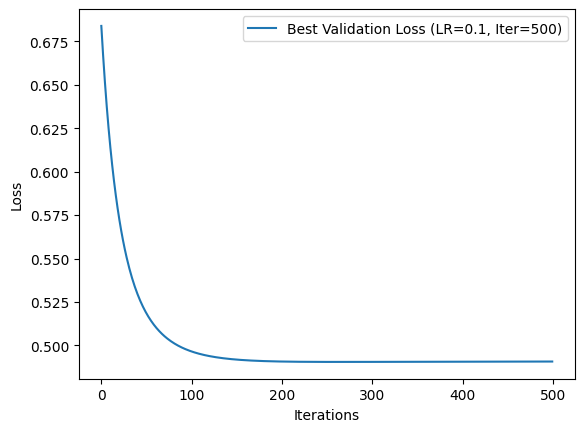

In [95]:
def run_experiment(learning_rates, num_iterations_list, X_train, y_train, X_val, y_val):
    best_loss = float('inf')
    best_lr = None
    best_iter = None
    best_val_losses = None

    for lr in learning_rates:
        for num_iter in num_iterations_list:
            # Create and train the model
            model = LogisticRegressionFromScratch(learning_rate=lr, num_iterations=num_iter)
            train_losses, val_losses = model.fit(X_train, y_train, X_val, y_val)

            # Record the final validation loss
            final_val_loss = val_losses[-1]
            print(f"Learning Rate: {lr}, Iterations: {num_iter}, Final Validation Loss: {final_val_loss}")

            # Check if this is the best (lowest) validation loss we've seen so far
            if final_val_loss < best_loss:
                best_loss = final_val_loss
                best_lr = lr
                best_iter = num_iter
                best_val_losses = val_losses

    return best_lr, best_iter, best_val_losses

# Define ranges of learning rates and iterations to try
learning_rates = [0.001, 0.01, 0.1]
num_iterations_list = [100, 200, 500]

# Run the experiment
best_lr, best_iter, best_val_losses = run_experiment(learning_rates, num_iterations_list, X_train_scaled, y_train, X_val_scaled, y_val)

if best_val_losses is not None:
    plt.plot(best_val_losses, label=f'Best Validation Loss (LR={best_lr}, Iter={best_iter})')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
else:
    print("No best validation losses found.")

Combine the validation and training data and retrain the final model with the chosen hyperparameters.

In [96]:
X_train_val_combined = np.vstack((X_train_scaled, X_val_scaled))
y_train_val_combined = np.concatenate((y_train, y_val))

# Create a new instance of the logistic regression model with the chosen hyperparameters
final_model = LogisticRegressionFromScratch(learning_rate=best_lr, num_iterations=best_iter)

# Retrain the model using the combined training and validation data
final_train_losses, _ = final_model.fit(X_train_val_combined, y_train_val_combined)

Evaluate the accuracy of your model on the testing data and report the results.

In [97]:
X_test_scaled = scaler.transform(X_test)

# Predict the labels for the test set
y_pred = final_model.sigmoid(np.dot(X_test_scaled, final_model.weights))
y_pred_class = (y_pred >= 0.5).astype(int)

# Calculate the accuracy of the model on the test data
accuracy = np.mean(y_pred_class == y_test)
print("Accuracy on testing data:", accuracy)

Accuracy on testing data: 0.8100558659217877
